In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv ('got_book_1.csv')

In [9]:
df.shape

(684, 5)

In [10]:
df.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [11]:
df.tail()

,Source,Target,Type,weight,book
679,Tyrion-Lannister,Willis-Wode,Undirected,4,1
680,Tyrion-Lannister,Yoren,Undirected,10,1
681,Tywin-Lannister,Varys,Undirected,4,1
682,Tywin-Lannister,Walder-Frey,Undirected,8,1
683,Waymar-Royce,Will-(prologue),Undirected,18,1


In [12]:
df.describe()

,weight,book
count,684.000000,684.0
mean,10.769006,1.0
std,17.294432,0.0
min,3.000000,1.0
25%,4.000000,1.0
50%,5.000000,1.0
75%,11.000000,1.0
max,291.000000,1.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Source  684 non-null    object
 1   Target  684 non-null    object
 2   Type    684 non-null    object
 3   weight  684 non-null    int64 
 4   book    684 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 26.8+ KB


In [15]:
# pick only the important characters
df_imp = df.loc[df['weight'] > 30, :]

In [16]:
df_imp.shape

(48, 5)

In [17]:
df_imp.head(10)

,Source,Target,Type,weight,book
9,Aemon-Targaryen-(Maester-Aemon),Jon-Snow,Undirected,34,1
30,Alliser-Thorne,Jon-Snow,Undirected,32,1
49,Arya-Stark,Joffrey-Baratheon,Undirected,39,1
50,Arya-Stark,Jon-Snow,Undirected,37,1
53,Arya-Stark,Mordane,Undirected,39,1
62,Arya-Stark,Sansa-Stark,Undirected,104,1
83,Barristan-Selmy,Robert-Baratheon,Undirected,40,1
91,Benjen-Stark,Jon-Snow,Undirected,41,1
123,Bran-Stark,Jon-Snow,Undirected,56,1
126,Bran-Stark,Luwin,Undirected,65,1


In [18]:
df_imp.describe()

,weight,book
count,48.000000,48.0
mean,56.145833,1.0
std,40.641656,0.0
min,31.000000,1.0
25%,35.500000,1.0
50%,42.000000,1.0
75%,64.250000,1.0
max,291.000000,1.0


In [19]:
import networkx as nx

In [30]:
# create a graph
G = nx.from_pandas_edgelist (
    df_imp,
    source = 'Source',
    target = 'Target',
    edge_attr = 'weight'
)

In [31]:
# get details of the graph
print('No of characters: ', len(G.nodes))
print('No of connections: ', len(G.edges))

No of characters:  38
No of connections:  48


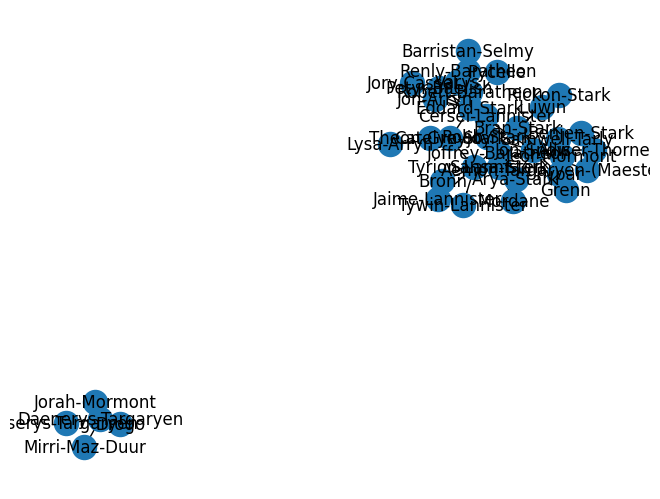

In [33]:
nx.draw(G, with_labels=True)
plt.show()

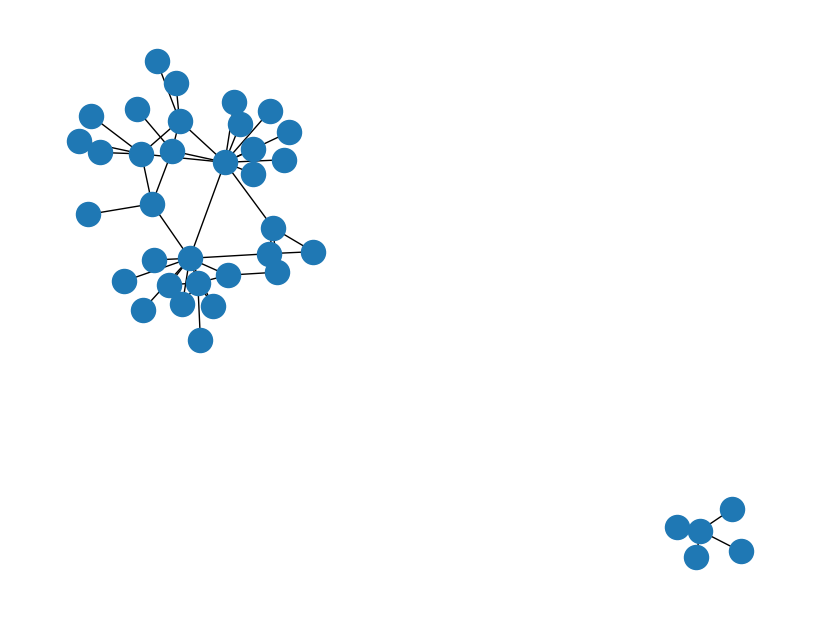

In [34]:
# all graph options
graph_viz_options = [
    nx.draw,
    nx.draw_networkx,
    nx.draw_circular,
    nx.draw_kamada_kawai,
    nx.draw_random,
    nx.draw_shell,
    nx.draw_spring
]

# plot
selected_graph_option = 0

plt.figure(figsize = (8,6), dpi = 100)
graph_viz_options[selected_graph_option](G)

In [36]:
from pyvis.network import Network

net = Network (
    notebook = True,
    width = 1000,
    height = 600,
    cdn_resources = 'in_line'
)

net.from_nx (G)

net.show ('GoT.html')

GoT.html
